<a href="https://colab.research.google.com/github/EstherOgutu/Nairobi-Hospital-Hypothyroidism-Analysis/blob/main/Nairobi_Hospital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAIROBI HOSPITAL THYROID PATIENTS ANALYSIS

##1. Defining the Question

###a) Specifying the Data Analytic Question


This is an analysis to determine whether or not the patient's symptoms indicate that the patient has hypothyroid. Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients.

###b) Defining the Metric of Success


The metric of success for this project is to build a model that can predic whether or not the patient's symptoms indicate that the patient has hypothyroid. The accuracy level of the prediction model should be atleast 95% to be termed as a good model.

###c) Understanding the Context


Nairobi Hospital is among the most reputable private hosiptal in Kenya.It specializes in the treatment of many diseases, among them is hypothyroidism, which is a common condition where the thyroid doesn't create and release enough thyroid hormone into your bloodstream. This makes your metabolism slow down. Also called underactive thyroid, hypothyroidism can make you feel tired, gain weight and be unable to tolerate cold temperatures.

###d) Recording the Experimental Data


For this project, I will perform the following actions:

1.Reading the data.

2.Checking the data.

3.Tidying the datasets Analysis. For the cleaning part, I will check for outliers, anomalies, missing values,checking for duplicates,dropping unnecessary columns and changing the column names into lowercase for uniformity and stripping off whitespaces and dashes.

4.I will the perform EDA (Univariate,Bivariate, and Multivariate).

5 Performing Predictive Anaysis using:

   1: Decision trees:Random forests, Ada boosted trees, and gradient boosted trees.

  2: SVM: Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step 

6.Challenge your solution by providing insights on how you can make improvements in model improvement.



###e) Data Relevance

The data has been provided by Nairobi Hospital. The data has attributes that are crucial for the company, since it will help the hospital to predict how many patients are at the risk of developing hypothyroid. Early detection helps in treating the disease before it becomes severe.

##2. Reading Data

In [2]:
# Importing the Libraries that we will use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression


In [23]:
# Let's expand the no of visible columns of dataframe
pd.set_option("display.max.columns", None)

In [88]:
# Reading the data from the dataset
hypothyroid=pd.read_csv('hypothyroid.csv')

##3. Checking the data

In [89]:
# Previewing the first five record in the dataset
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [90]:
# Previewing the first five record in the dataset
hypothyroid.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [91]:
# Checking the shape of the datasets (rows and columns)
hypothyroid.shape

(3163, 26)

Our housing dataset has 21613 rows and 20 columns

In [92]:
# Understanding our housing dataset 
hypothyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [93]:
# Checking all the columns have the appropriate datatype
hypothyroid.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [94]:
# Checking the statistical information of the numerical values in our datasets
hypothyroid.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


In [95]:
# Dropping all records with "?" in the age column
new_hypothyroid = hypothyroid[hypothyroid.age != '?']

In [96]:
# Replacing all the values in our columns 'TSH','T3','TT4','T4U','FTI','TBG that have "?" with 0 
new_hypothyroid[['TSH','T3','TT4','T4U','FTI','TBG']] = new_hypothyroid[['TSH','T3','TT4','T4U','FTI','TBG']].replace(['?'],0)

In [97]:
new_hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,0
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,0
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,0
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,0
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,0


In [98]:
 # Converting the columns 'TSH','T3','TT4','T4U','FTI' from object datatype to float and 'age' from object to int
new_hypothyroid[['TSH','T3','TT4','T4U','FTI','TBG']] = new_hypothyroid[['TSH','T3','TT4','T4U','FTI','TBG']].astype(float, errors = 'raise')
new_hypothyroid['age'] = new_hypothyroid['age'].astype(int, errors = 'raise')

In [99]:
# Checking the dtypes of the new dataset
new_hypothyroid.dtypes

status                        object
age                            int64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                          float64
dtype: object

In [100]:
# Checking the old and new shape of our dataset after some cleaning, plus calculating the percentage of data lost
print('Old Shape' +str(hypothyroid.shape))
print('New Shape' +str(new_hypothyroid.shape))
data_lost = hypothyroid.shape[0] - new_hypothyroid.shape[0]
percent = (data_lost / hypothyroid.shape[0]) * 100
print("Number of data samples lost:", data_lost)
print("Percent of data samples lost:", round(percent, 2))

Old Shape(3163, 26)
New Shape(2717, 26)
Number of data samples lost: 446
Percent of data samples lost: 14.1


We've lost 14% of our data, which is not bad for our analysis.

In [101]:
# Checking the statistical information of the numerical values in our datasets
new_hypothyroid.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,2717.000000,2717.00000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000
mean,51.154214,5.07495,1.492050,100.366544,0.909993,103.050350,2.636768
std,19.294405,22.23196,1.205217,52.975889,0.343717,51.498236,10.363246
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.00000,0.400000,76.000000,0.830000,84.000000,0.000000
50%,54.000000,0.30000,1.600000,100.000000,0.950000,104.000000,0.000000
75%,67.000000,1.70000,2.200000,125.000000,1.060000,126.000000,0.000000
max,98.000000,530.00000,10.200000,450.000000,2.030000,450.000000,122.000000


##4. External Data Source Validation

The data has been obtained from Nairobi Hospitak, which is the company for which I am conducting the analysis for. The data is, therefore valid and credible.

##5. Tidying the Datasets

In [102]:
# Checking for Outliers using IQR method
# Defining a function to check for outliers

def outliers(data):
  # Calculating the first quantile
  Q1=data.quantile(0.25) 
  # Calculating the third quantile
  Q3 = data.quantile(0.75)
  # Calculating the Quartile Range
  IQR = Q3 - Q1 
  print((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
  print('-------------------------------------------------------------------------------')
  #Displaying the number of outliers in the fields where the exist
  print(IQR)
outliers(new_hypothyroid)

        FTI  FTI_measured     T3  T3_measured    T4U  T4U_measured    TBG  \
0      True         False  False        False   True         False  False   
1      True         False  False        False  False         False  False   
2      True         False  False        False  False         False  False   
3      True         False  False        False  False         False  False   
4     False         False  False        False  False         False  False   
...     ...           ...    ...          ...    ...           ...    ...   
3158  False         False  False        False  False         False  False   
3159  False         False  False        False  False         False  False   
3160  False         False  False        False  False         False  False   
3161  False         False  False        False   True         False  False   
3162  False         False  False        False  False         False  False   

      TBG_measured    TSH  TSH_measured    TT4  TT4_measured    age  goitre

In [120]:
# Dealing with outliers
# We are using the trim method to deal with the outliers

columns=new_hypothyroid[['age','TSH','T3','TT4','T4U','FTI','TBG']]
# Iterating over the columns in our new dataframe to get the values that are not within the upper and lower limit
for index, c in columns.iteritems():
  # Defining the upper limit
  upper_limit=c.mean() + 3*c.std()
  # Defining the lower limit
  lower_limit=c.mean() - 3*c.std()
  # Applying the trim to our dataframe
  new_hypothyroid1 = new_hypothyroid[(c <= upper_limit) & (c >= lower_limit)]
# Checking the old shape and the new shape after the trim
print('Old Shape' +str(new_hypothyroid[['age','TSH','T3','TT4','T4U','FTI','TBG']].shape))
print('New Shape' +str(new_hypothyroid1[['age','TSH','T3','TT4','T4U','FTI','TBG']].shape))
data_lost = new_hypothyroid[['age','TSH','T3','TT4','T4U','FTI','TBG']].shape[0] - new_hypothyroid1[['age','TSH','T3','TT4','T4U','FTI','TBG']].shape[0]
percent = (data_lost / new_hypothyroid[['age','TSH','T3','TT4','T4U','FTI','TBG']].shape[0]) * 100
print("Number of data samples lost:", data_lost)
print("Percent of data samples lost:", round(percent, 2))

Old Shape(2717, 7)
New Shape(2659, 7)
Number of data samples lost: 58
Percent of data samples lost: 2.13


We have lost 2.13% of our data. This is not so much data lost.

In [123]:
# Printing the statistical information of our old and new dataset(after the trim)
print(tabulate(new_hypothyroid.describe(), headers='keys', tablefmt='psql'))
print(tabulate(new_hypothyroid1.describe(), headers='keys', tablefmt='psql'))

+-------+-----------+------------+------------+-----------+-------------+-----------+------------+
|       |       age |        TSH |         T3 |       TT4 |         T4U |       FTI |        TBG |
|-------+-----------+------------+------------+-----------+-------------+-----------+------------|
| count | 2717      | 2717       | 2717       | 2717      | 2717        | 2717      | 2717       |
| mean  |   51.1542 |    5.07495 |    1.49205 |  100.367  |    0.909993 |  103.05   |    2.63677 |
| std   |   19.2944 |   22.232   |    1.20522 |   52.9759 |    0.343717 |   51.4982 |   10.3632  |
| min   |    1      |    0       |    0       |    0      |    0        |    0      |    0       |
| 25%   |   35      |    0       |    0.4     |   76      |    0.83     |   84      |    0       |
| 50%   |   54      |    0.3     |    1.6     |  100      |    0.95     |  104      |    0       |
| 75%   |   67      |    1.7     |    2.2     |  125      |    1.06     |  126      |    0       |
| max   | 

From the statistical data, we see a big difference between the old and new dataframes. For instance, in the TSH column, in the old dataset, the max is 530, yet the mean is 5.07. After the trim, the max is 71, which makes so much sense. This shows that our new dataset is fit to give us credible analysis.

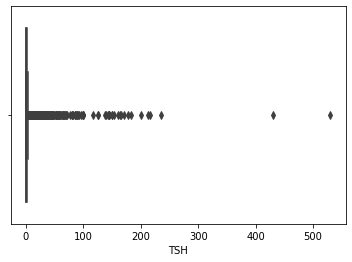

In [121]:
# Boxplot for the bedrooms column before the trim
sns.boxplot(new_hypothyroid['TSH'])

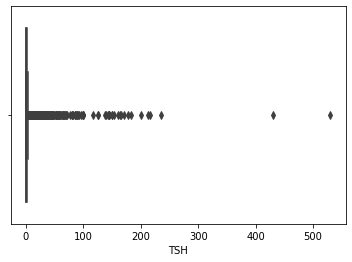

In [122]:
# Boxplot for the bedrooms column after the trim
sns.boxplot(new_hypothyroid1['TSH'])

In [125]:
# Checking for Anomalies

# Defining a function to check for any duplicates in the datasets
def duplicates(data):
  print(data.duplicated().sum())
duplicates(new_hypothyroid1)

66


In [127]:
# Displaying the duplicated rows in the dataset
duplicate = new_hypothyroid1[new_hypothyroid1.duplicated()]
duplicate

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
53,hypothyroid,69,F,f,f,f,f,f,f,f,f,f,f,f,y,21.0,y,0.8,y,53.0,y,0.86,y,61.0,n,0.0
66,hypothyroid,62,M,f,f,f,f,f,f,f,f,f,f,f,y,100.0,y,0.4,y,10.0,y,1.00,y,10.0,n,0.0
124,hypothyroid,77,F,f,f,f,f,f,f,f,f,f,f,f,y,23.0,y,0.5,y,33.0,y,0.67,y,49.0,n,0.0
128,hypothyroid,79,F,f,f,f,f,f,f,f,f,f,f,f,y,29.0,y,1.6,y,47.0,y,0.97,y,48.0,n,0.0
131,hypothyroid,50,F,t,f,f,f,f,f,f,f,f,f,f,y,34.0,n,0.0,y,55.0,y,0.93,y,60.0,n,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,negative,28,M,f,f,f,f,f,f,f,f,f,f,f,y,1.0,y,3.1,y,107.0,y,1.05,y,103.0,n,0.0
3055,negative,33,F,f,f,f,f,f,f,f,f,f,f,f,n,0.0,y,0.8,y,88.0,y,1.02,y,86.0,n,0.0
3066,negative,74,F,t,f,f,f,f,f,f,f,f,f,f,y,21.0,y,1.8,y,126.0,y,1.18,y,107.0,n,0.0
3111,negative,89,M,f,f,f,f,f,f,f,f,f,f,f,y,1.3,y,0.9,y,82.0,y,0.80,y,103.0,n,0.0


We have 66 duplicate values in the dataset. On cross-checking, we realize that the duplication is justified because they are different entries, but have the same value in different columns. 
In this case, the duplicates will not be dropped.

In [128]:
# Find the total Missing Data in each column
def missingdata(data):
  print(data.isnull().sum())
missingdata(new_hypothyroid1)

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64


There are no missing values in our dataset.

In [165]:
#To ensure uniformity,we will change the column names to lower case, stripping of the whitespaces,removing periods, 
#this ensures good readerbility plus every possible naming issue is covered.
new_hypothyroid1.columns = new_hypothyroid1.columns.str.lower().str.strip().str.replace(' ', '_').str.replace('.', '')
print(new_hypothyroid1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2659 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     2659 non-null   object 
 1   age                        2659 non-null   int64  
 2   sex                        2659 non-null   object 
 3   on_thyroxine               2659 non-null   object 
 4   query_on_thyroxine         2659 non-null   object 
 5   on_antithyroid_medication  2659 non-null   object 
 6   thyroid_surgery            2659 non-null   object 
 7   query_hypothyroid          2659 non-null   object 
 8   query_hyperthyroid         2659 non-null   object 
 9   pregnant                   2659 non-null   object 
 10  sick                       2659 non-null   object 
 11  tumor                      2659 non-null   object 
 12  lithium                    2659 non-null   object 
 13  goitre                     2659 non-null   objec

In [166]:
# Exporting our cleaned fifa dataset
#
new_hypothyroid1.to_csv("hthyroid.csv", index=False)

In [167]:
# Lets read our dataset from our CSV file and create a dataframe that we will use
#
hthyroid_df=pd.read_csv('hthyroid.csv')

# Previewing the first five records using our tabulatetable function created earlier
hthyroid_df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,0.0
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,0.0
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,0.0
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,0.0
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,0.0


In [168]:
# Let's check for Nan values in the dataset
hthyroid_df.isnull().sum().sum()

0

Our dataset frames has no missing values

##6. Exploratory Data Analysis

###1. Univariate Analysis

In [169]:
# Getting a description of the statistics of numerical values
hthyroid_df.describe()

,age,tsh,t3,tt4,t4u,fti,tbg
count,2659.000000,2659.000000,2659.000000,2659.00000,2659.000000,2659.000000,2659.000000
mean,51.391877,5.185649,1.524596,102.55581,0.929842,105.298157,1.534449
std,19.244219,22.460432,1.197751,51.41087,0.319775,49.730874,6.083667
min,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.600000,78.00000,0.840000,86.000000,0.000000
50%,54.000000,0.300000,1.600000,101.00000,0.950000,105.000000,0.000000
75%,67.000000,1.700000,2.200000,125.50000,1.060000,127.000000,0.000000
max,98.000000,530.000000,10.200000,450.00000,2.030000,450.000000,33.000000


In [170]:
# Displaying the total value of the different status
hthyroid_df.status.value_counts()

negative       2523
hypothyroid     136
Name: status, dtype: int64

In [171]:
# Displaying the total value of the different on_thyroxine results
hthyroid_df.on_thyroxine.value_counts()

f    2233
t     426
Name: on_thyroxine, dtype: int64

In [172]:
# Displaying the total value of the different pregnancy results
hthyroid_df.pregnant.value_counts()

f    2603
t      56
Name: pregnant, dtype: int64

In [173]:
# Displaying the total value of the different tumor results
hthyroid_df.tumor.value_counts()

f    2622
t      37
Name: tumor, dtype: int64

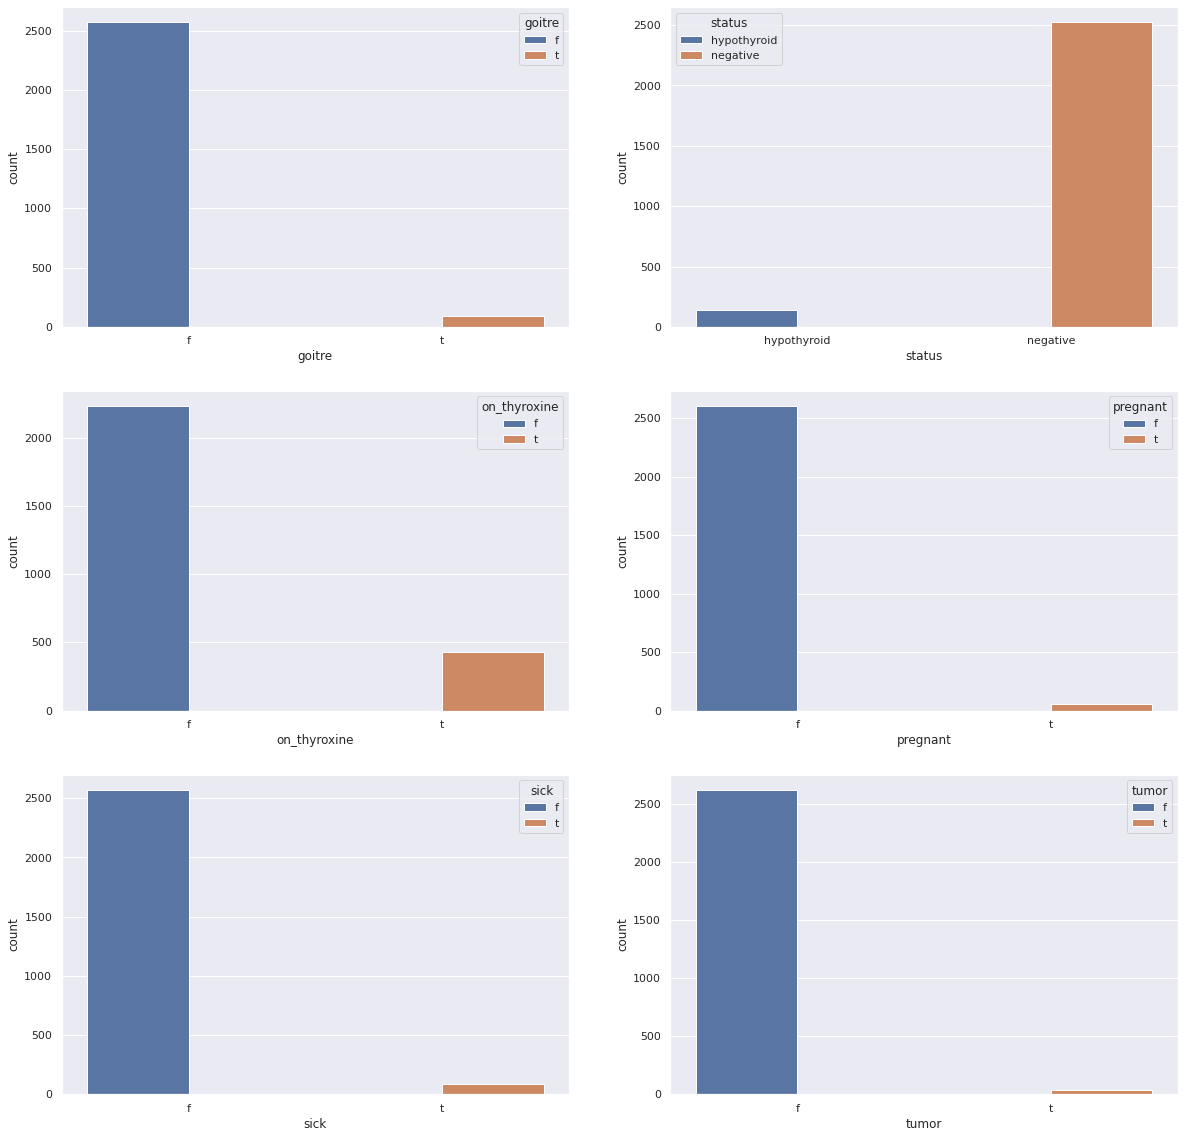

In [174]:
# Plotting Distribution Plots and Count Plots for the various attributes in our dataset
fig,axes=plt.subplots(3,2, figsize=(20,20))
sns.countplot('goitre', data=hthyroid_df, hue='goitre', ax=axes[0,0])
sns.countplot('status', data=hthyroid_df, hue='status', ax=axes[0,1])
sns.countplot('on_thyroxine', data=hthyroid_df, hue='on_thyroxine', ax=axes[1,0])
sns.countplot('pregnant', data=hthyroid_df, hue='pregnant', ax=axes[1,1]);
sns.countplot('sick', data=hthyroid_df, hue='sick', ax=axes[2,0]);
sns.countplot('tumor', data=hthyroid_df, hue='tumor', ax=axes[2,1]);

From the countplots, we can be able to gather some important information such as:
- Most people in the sample collected did not have goitre.
- Most people in the sample collected did not have hypothyroid.
- Most people in the sample collected did not have on_thyroxine.
- Most people in the sample collected were not pregnant.
- Most people in the sample collected were not sick.
- Most people in the sample collected did not have tumor.

###2. Bivariate Analysis

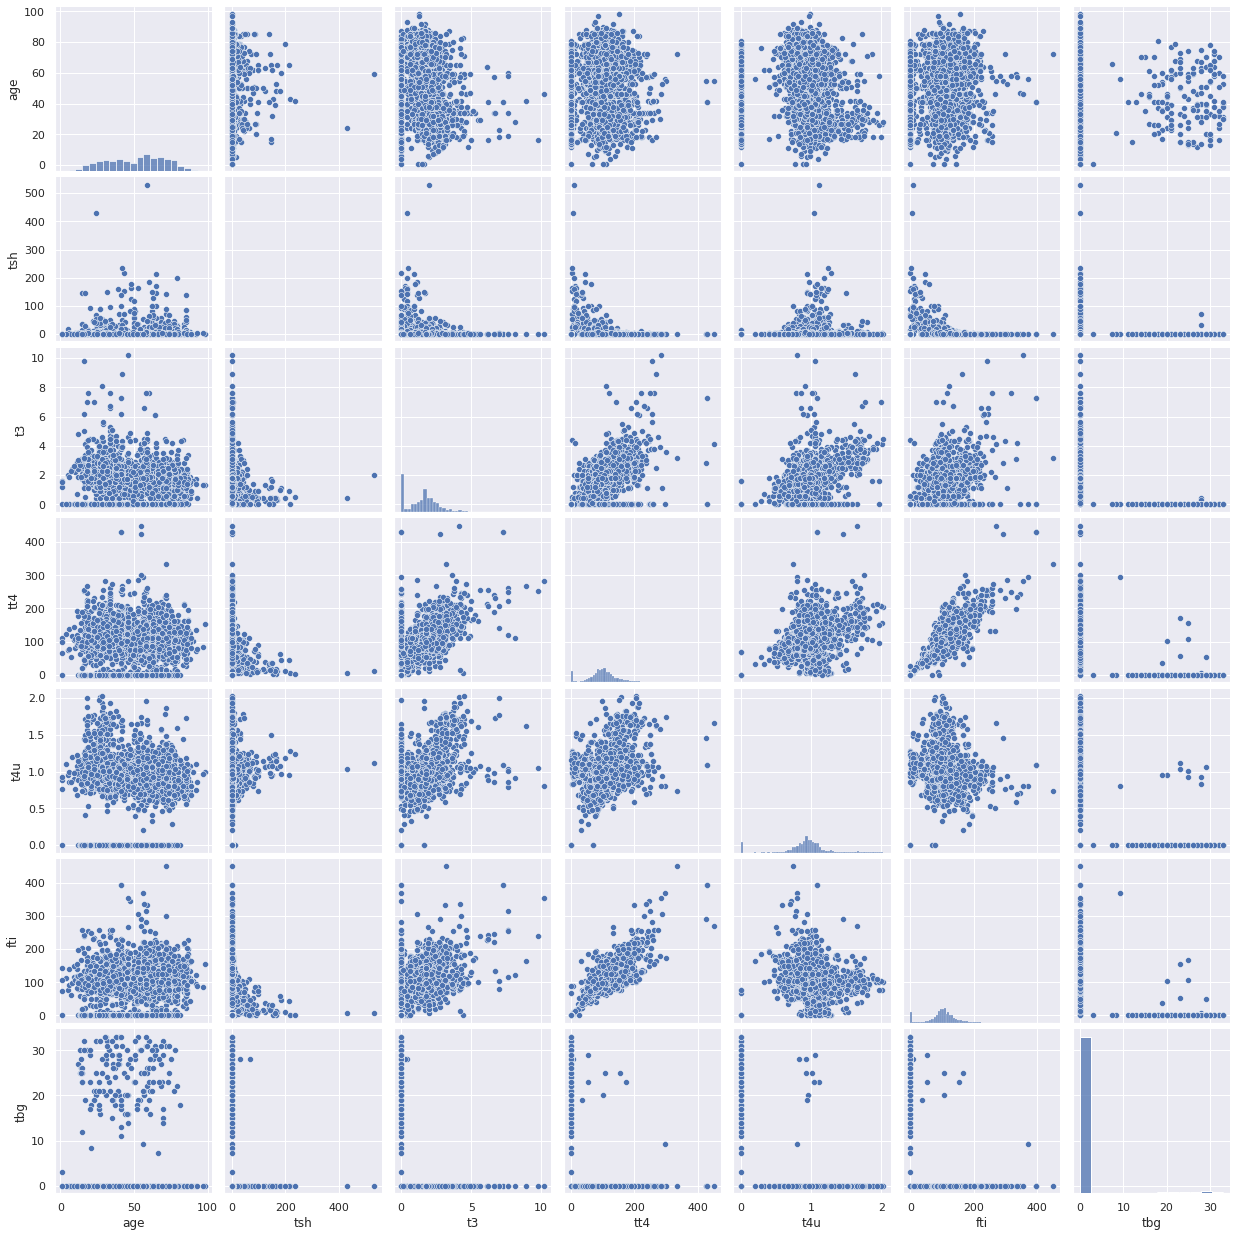

In [175]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(hthyroid_df)
plt.show()

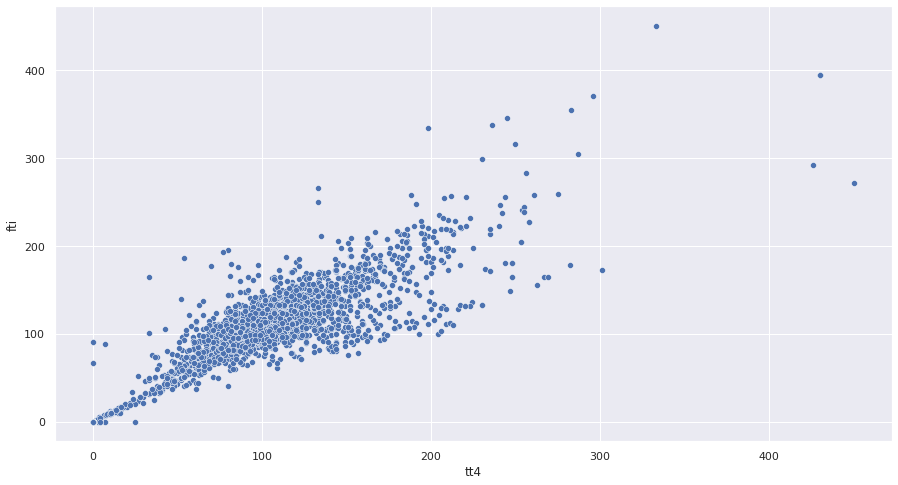

In [178]:
# Scatterplot showing if the TT4 is correlated to FTI
sns.scatterplot(x='tt4', y='fti',data=hthyroid_df);

From the scatter plot, we see that there is a positive correlation between FTI and TT4. The increase in one leads to the increase of the other.

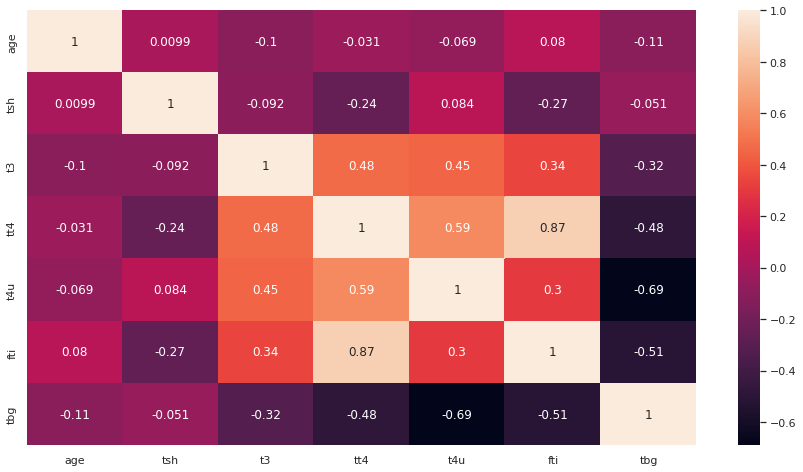

In [179]:
# Plotting a heatmap to show the correlation between the different numerical  variables
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(hthyroid_df.corr(),annot=True);

In the heatmap, the values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is(for instance, FTI and TT4). A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases (for instance, TBG and T4U).

From the table, we can see that the independent variables are not correlated. There is no value above 1.000